In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
features = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Walmart Store Sales/features.csv")
stores = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Walmart Store Sales/stores.csv")
train = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Walmart Store Sales/train.csv")

# EDA and Data Preprocessing

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
# Merge in one dataframe

df1 = train.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
df = df1.merge(stores, on = 'Store', how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
df.shape

(421570, 16)

In [8]:
df.duplicated().sum()

0

In [9]:
(df.isnull().sum()/len(df))*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [10]:
# As null values of all MarkDowns are above 30%, we will drop them

df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


In [12]:
df['Date']

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
             ...    
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, Length: 421570, dtype: object

In [13]:
# Change 'Date' dtype from object to date:

df['Date'] = pd.to_datetime(df['Date'])
# df.set_index(['Date'], inplace = True)

# dayfirst will make panda realise that day is before month otherwise panda will interpret as month is before day

In [14]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,192.308899,8.667,B,118221


In [15]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [18]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [19]:
df['Dept'].value_counts()

1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [20]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [21]:
df['IsHoliday'].unique()

array([False,  True])

In [22]:
df['Fuel_Price'] = df['Fuel_Price'].round(2)

In [23]:
df['CPI'] = df['CPI'].round(2)

In [24]:
df['Unemployment'] = df['Unemployment'].round(2)

In [25]:
df['Size'].unique()

array([151315, 202307,  37392, 205863,  34875, 202505,  70713, 155078,
       125833, 126512, 207499, 112238, 219622, 200898, 123737,  57197,
        93188, 120653, 203819, 203742, 140167, 119557, 114533, 128107,
       152513, 204184, 206302,  93638,  42988, 203750, 203007,  39690,
       158114, 103681,  39910, 184109, 155083, 196321,  41062, 118221],
      dtype=int64)

In [26]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361048,171.202014,7.959974,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458593,39.159264,1.863460,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.470000,126.060000,3.880000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.930000,132.020000,6.890000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.450000,182.320000,7.870000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.740000,212.420000,8.570000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.470000,227.230000,14.310000,219622.000000


# Multivariate Analysis

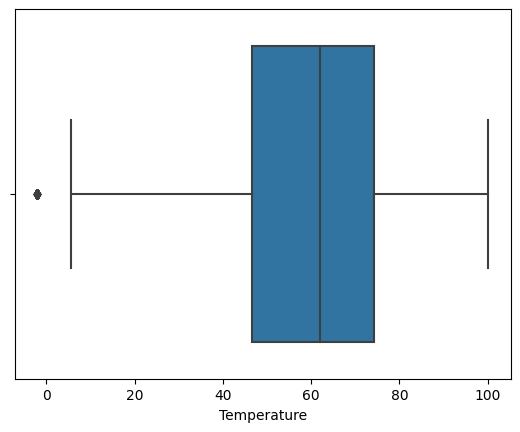

In [27]:
# Temperature

sns.boxplot(data = df, x = 'Temperature');

In [28]:
Q3 = df['Temperature'].quantile(.75)
Q1 = df['Temperature'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 = 1.5*IQR
print(UL)
print(LL)

115.68
41.400000000000006


In [29]:
df['Temperature'] = np.where(df['Temperature'] < 41.4, 41.4, np.where(df['Temperature'] > 115.68, 115.68, df['Temperature']))

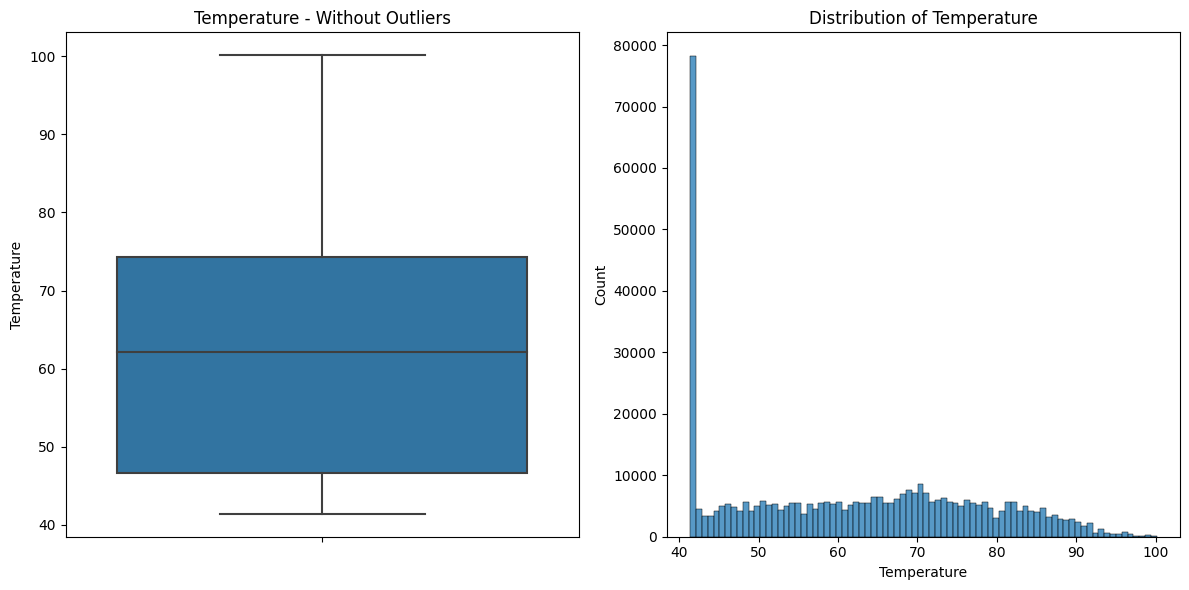

In [30]:
# Temperature

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

# Subplot 1 - Boxplot (without Outliers)
sns.boxplot(data = df, y= 'Temperature', ax=axes[0]);
axes[0].set_title('Temperature - Without Outliers');

# Subplot 2 - Distribution of Temperature
sns.histplot(data = df, x = 'Temperature', ax=axes[1]);
axes[1].set_title('Distribution of Temperature')

plt.tight_layout()
plt.show()
                                                  

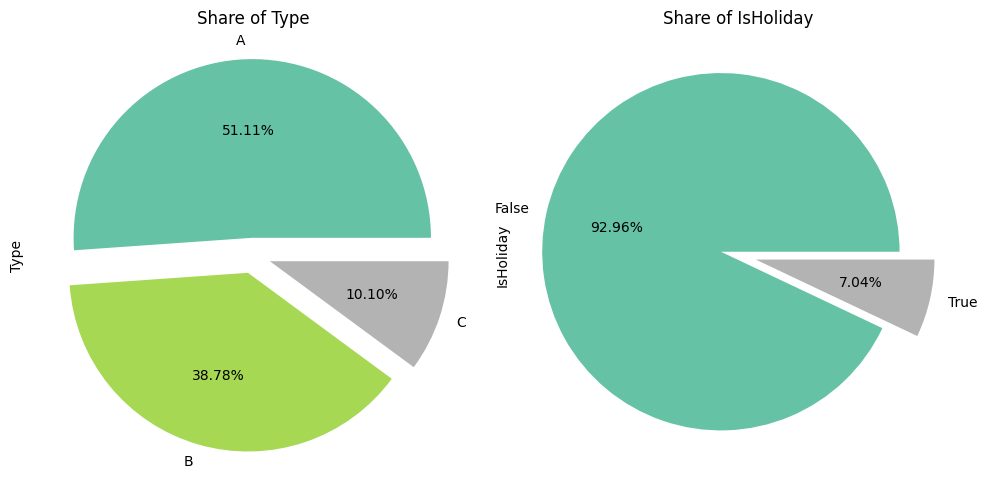

In [31]:
# Store and Holiday

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7))

# Subplot 1 - Boxplot (without Outliers)
df['Type'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1,0.1,0.1], ax=axes[0]);
axes[0].set_title('Share of Type');

# Subplot 2 - Distribution of Temperature
df['IsHoliday'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1,0.1], ax=axes[1]);
axes[1].set_title('Share of IsHoliday');

plt.tight_layout()
plt.show()
                       

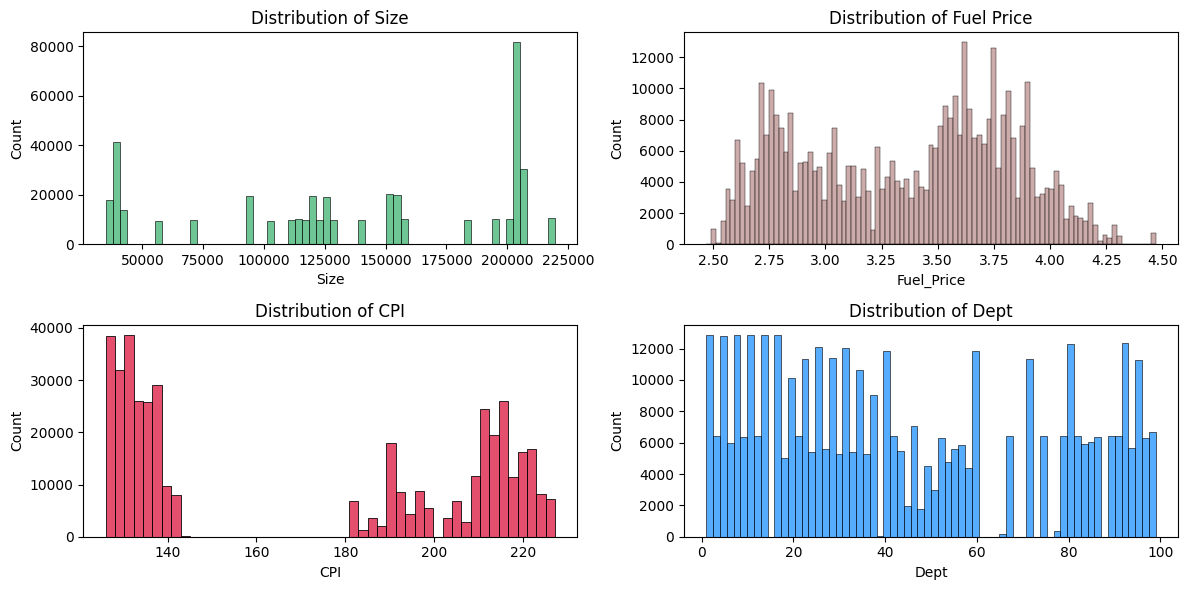

In [32]:
# Size, Fuel_Price, CPI, Dept

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))

# Subplot 1 - Distribution - Size
sns.histplot(data = df, x = 'Size', color = 'mediumseagreen', ax=axes[0,0]);
axes[0,0].set_title('Distribution of Size');

# Subplot 1 - Distribution - Fuel_Price
sns.histplot(data = df, x = 'Fuel_Price', color = 'rosybrown', ax=axes[0,1]);
axes[0,1].set_title('Distribution of Fuel Price')

# Subplot 1 - Distribution - CPI
sns.histplot(data = df, x = 'CPI', color = 'crimson', ax=axes[1,0]);
axes[1,0].set_title('Distribution of CPI');

# Subplot 1 - Distribution - Dept
sns.histplot(data = df, x = 'Dept', color = 'dodgerblue', ax=axes[1,1]);
axes[1,1].set_title('Distribution of Dept');


plt.tight_layout()
plt.show()
                       

In [33]:
# Split Date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Week_Day'] = df['Date'].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name()

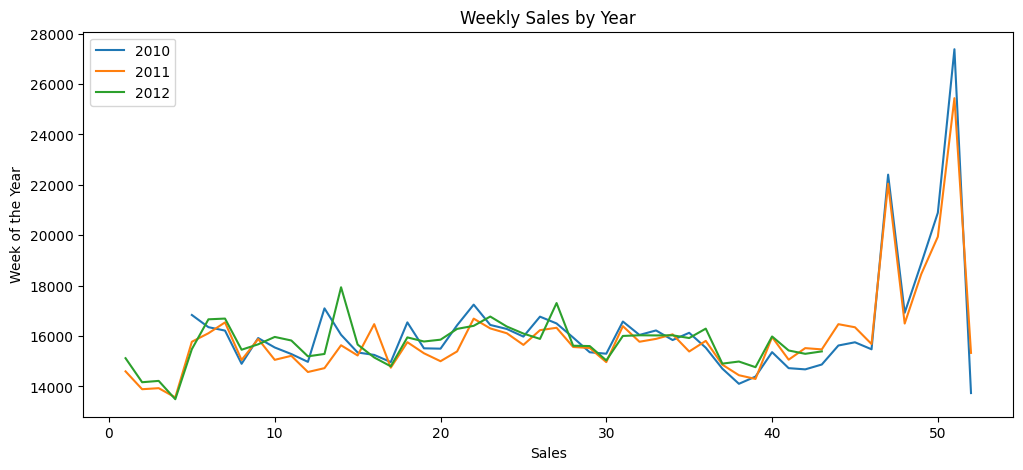

In [34]:
# Sales Analysis by Week

Week_Sales_2010 = df[df['Year'] == 2010].groupby('Week')['Weekly_Sales'].mean()
Week_Sales_2011 = df[df['Year'] == 2011].groupby('Week')['Weekly_Sales'].mean()
Week_Sales_2012 = df[df['Year'] == 2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize = (12,5))
plt.plot(Week_Sales_2010.index, Week_Sales_2010.values, label = '2010');
plt.plot(Week_Sales_2011.index, Week_Sales_2011.values, label = '2011');
plt.plot(Week_Sales_2012.index, Week_Sales_2012.values, label = '2012');
plt.title('Weekly Sales by Year');
plt.xlabel('Sales');
plt.ylabel('Week of the Year');


plt.legend()
plt.show()

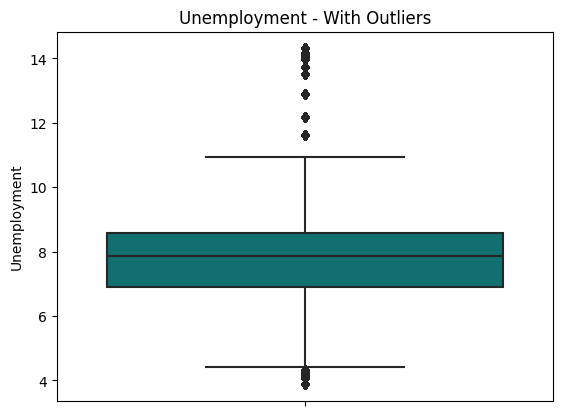

In [35]:
# Unemployment 

sns.boxplot(data = df, y = 'Unemployment', color = 'teal');
plt.title('Unemployment - With Outliers');

In [36]:
Q3 = df['Unemployment'].quantile(.75)
Q1 = df['Unemployment'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 = 1.5*IQR
print(UL)
print(LL)

11.090000000000002
2.520000000000001


In [37]:
df['Unemployment'] = np.where(df['Unemployment'] > 11.09, 11.09, np.where(df['Unemployment'] < 5, 5, df['Unemployment']))

# As outliers were still showing when replaced by 2.52 (LL), we tried increasing that value untill no outlier is shown now when replaced by 5

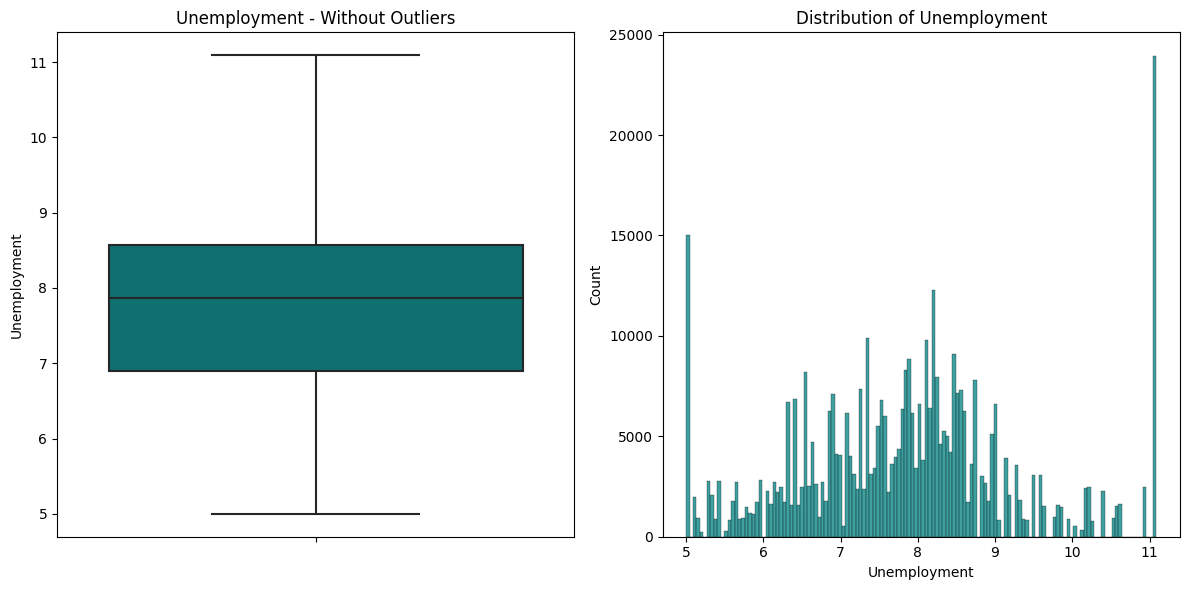

In [38]:
# Temperature

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

# Subplot 1 - Boxplot (without Outliers)
sns.boxplot(data = df, y= 'Unemployment', ax=axes[0], color = 'teal');
axes[0].set_title('Unemployment - Without Outliers');

# Subplot 2 - Distribution of Temperature
sns.histplot(data = df, x = 'Unemployment', ax=axes[1], color = 'teal');
axes[1].set_title('Distribution of Unemployment')

plt.tight_layout()
plt.show()
                                                  

# Multivariate Analysis

<Figure size 1200x700 with 0 Axes>

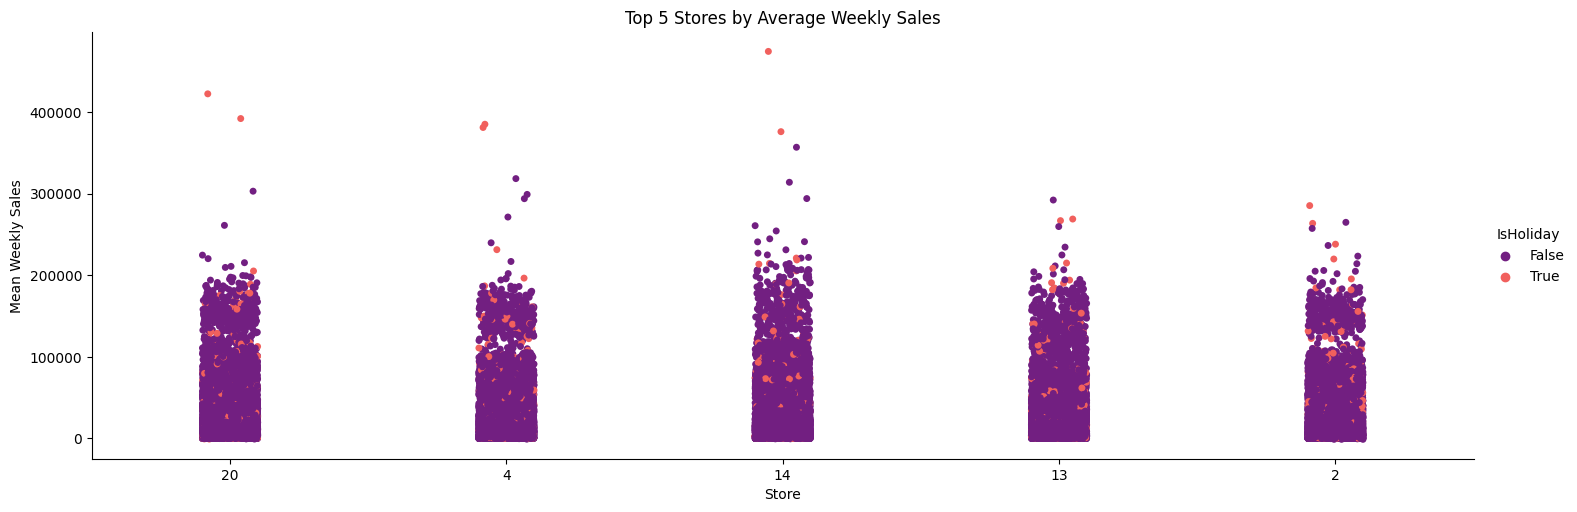

In [39]:
# Stores and Sales

sorted_stores_sales_ = df.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending = False).round(2).head(5).index;
plt.figure(figsize = (12,7));
sns.catplot(data = df, x = 'Store', y = 'Weekly_Sales', palette = 'magma', order = sorted_stores_sales_, hue = 'IsHoliday', height = 5, aspect = 3);
plt.xlabel('Store');
plt.ylabel('Mean Weekly Sales');
plt.title('Top 5 Stores by Average Weekly Sales');

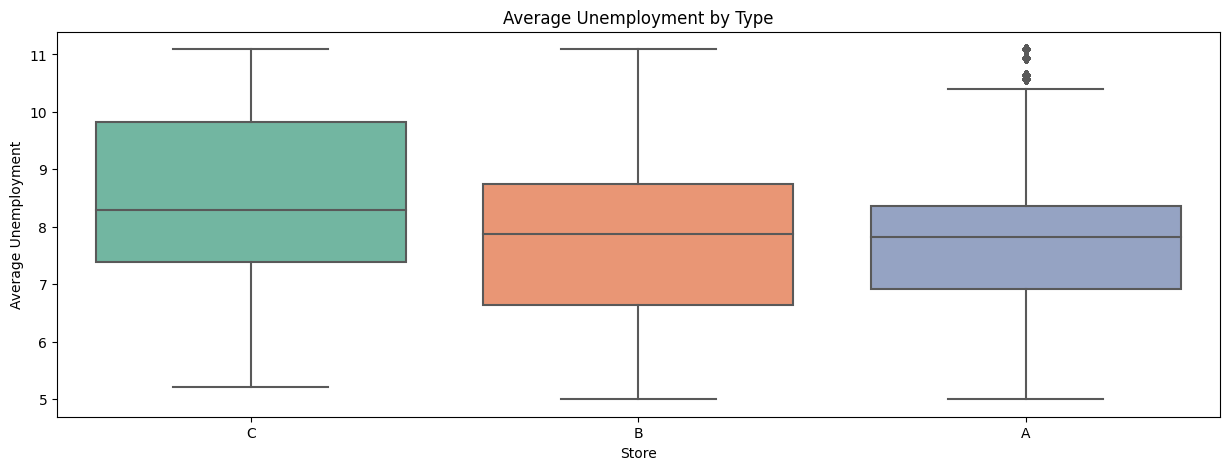

In [40]:
# Type and Unemployment

sorted_unemployment_type = df.groupby('Type')['Unemployment'].mean().sort_values(ascending = False).head(5).round(2).index

plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'Type', y = 'Unemployment', palette = 'Set2', order = sorted_unemployment_type);
plt.title('Average Unemployment by Type');
plt.xlabel('Store');
plt.ylabel('Average Unemployment');

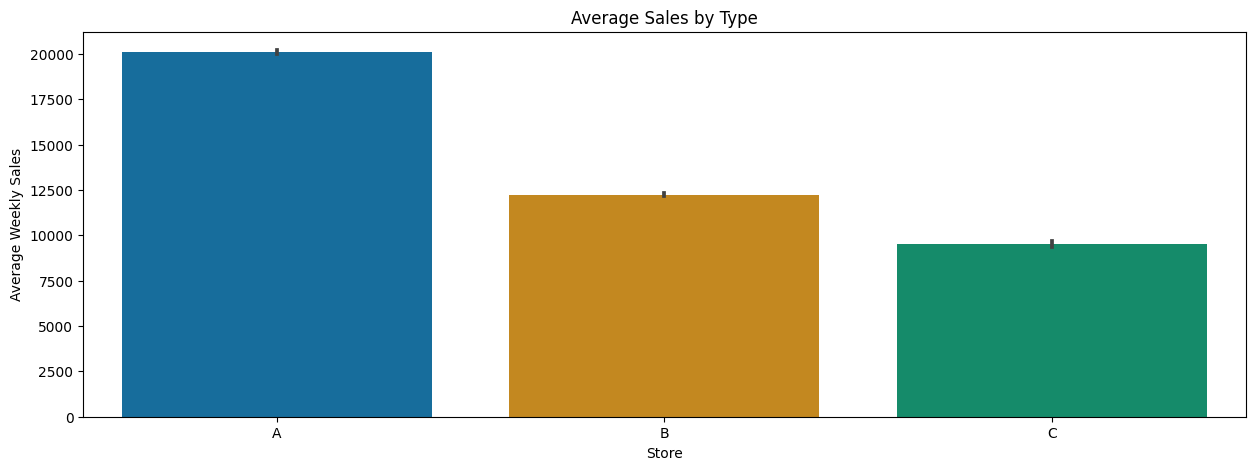

In [41]:
# Type and Sales

sorted_type_sales = df.groupby(['Type'])['Weekly_Sales'].mean().sort_values(ascending = False).round(2).head(5).index;

plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'Type', y = 'Weekly_Sales', palette = 'colorblind', order = sorted_type_sales);
plt.title('Average Sales by Type');
plt.xlabel('Store');
plt.ylabel('Average Weekly Sales');

In [42]:
df.drop(['Week_Day'], axis = 1, inplace = True)
df.sample(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,Month_Name
24943,3,56,2011-06-10,834.52,False,84.84,3.65,218.40,7.57,B,37392,2011,6,23,June
347856,37,90,2010-08-13,40655.37,False,86.06,2.69,210.39,8.36,C,39910,2010,8,32,August
164834,17,14,2012-02-24,10627.02,False,41.40,3.14,130.55,6.40,B,93188,2012,2,8,February
24631,3,71,2011-05-06,534.42,False,69.45,3.91,219.20,7.57,B,37392,2011,5,18,May
91706,10,34,2011-03-11,40943.90,False,64.22,3.63,128.40,8.74,B,126512,2011,3,10,March
180448,19,85,2010-12-17,12041.11,False,41.40,3.30,132.68,8.07,A,203819,2010,12,50,December
238612,25,11,2010-07-09,20918.25,False,75.24,2.79,204.36,7.53,B,128107,2010,7,27,July
323234,34,46,2010-10-22,15261.68,False,58.11,2.74,126.38,10.21,A,158114,2010,10,42,October
389752,41,71,2012-06-22,6259.48,False,66.88,3.74,197.74,6.55,A,196321,2012,6,25,June
293772,31,95,2010-02-05,111773.67,False,41.40,2.57,210.75,8.32,A,203750,2010,2,5,February


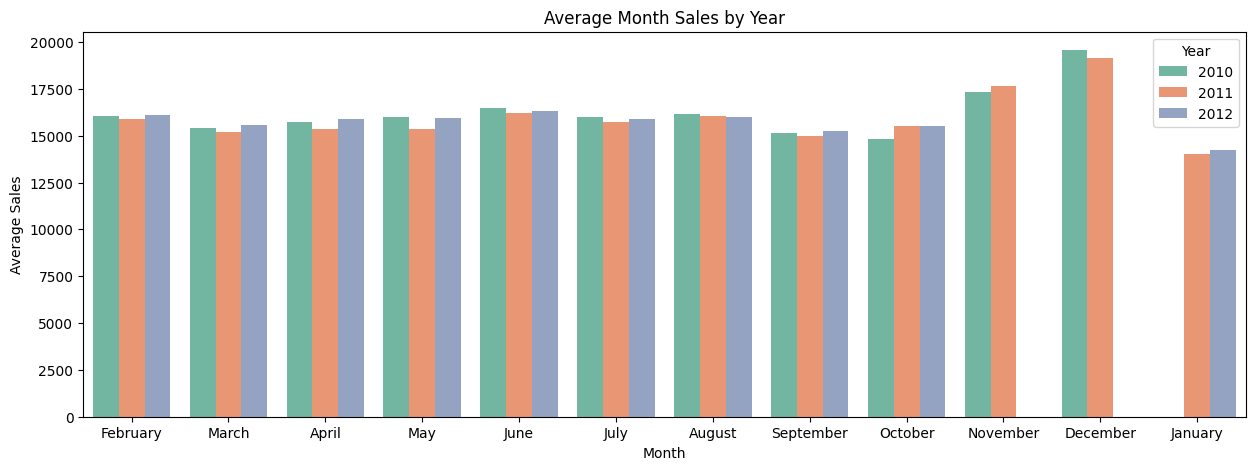

In [43]:
# Sales by Month

plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'Month_Name', y = 'Weekly_Sales', hue = 'Year', palette = 'Set2', errorbar = None, estimator = np.mean);
plt.title('Average Month Sales by Year');
plt.xlabel('Month');
plt.ylabel('Average Sales');

<Figure size 1500x500 with 0 Axes>

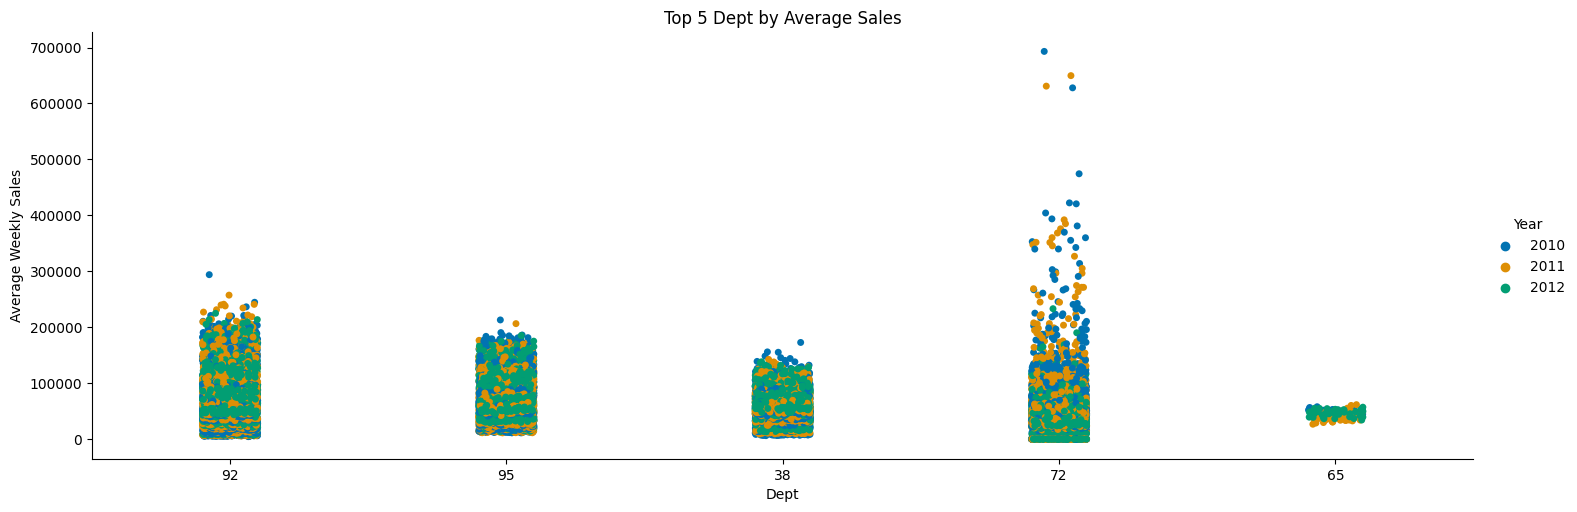

In [44]:
# Sales by Dept

sorted_dept_sales = df.groupby(['Dept'])['Weekly_Sales'].mean().sort_values(ascending = False).round(2).head(5).index

plt.figure(figsize = (15,5))
sns.catplot(data = df, x = 'Dept', y = 'Weekly_Sales', palette = 'colorblind', hue = 'Year', order = sorted_dept_sales, height = 5, aspect = 3);
plt.title('Top 5 Dept by Average Sales');
plt.xlabel('Dept');
plt.ylabel('Average Weekly Sales');

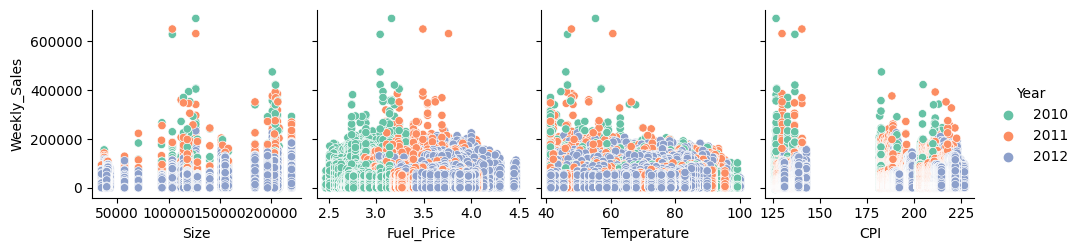

In [45]:
# Pairplot

sns.pairplot(data = df, x_vars = ['Size', 'Fuel_Price', 'Temperature', 'CPI'], y_vars = 'Weekly_Sales', hue = 'Year', palette = 'Set2');

# Getting Dummies and Multicollinearity Check

In [46]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(include = np.number)
df_dummy = pd.get_dummies(df_cat, drop_first = True)
data = pd.concat([df_dummy, df_num], axis = 1)
data

,Type_B,Type_C,Month_Name_August,Month_Name_December,Month_Name_February,Month_Name_January,Month_Name_July,Month_Name_June,Month_Name_March,Month_Name_May,...,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week
0,0,0,0,0,1,0,0,0,0,0,...,1,24924.50,42.31,2.57,211.10,8.11,151315,2010,2,5
1,0,0,0,0,1,0,0,0,0,0,...,2,50605.27,42.31,2.57,211.10,8.11,151315,2010,2,5
2,0,0,0,0,1,0,0,0,0,0,...,3,13740.12,42.31,2.57,211.10,8.11,151315,2010,2,5
3,0,0,0,0,1,0,0,0,0,0,...,4,39954.04,42.31,2.57,211.10,8.11,151315,2010,2,5
4,0,0,0,0,1,0,0,0,0,0,...,5,32229.38,42.31,2.57,211.10,8.11,151315,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1,0,0,0,0,0,0,0,0,0,...,93,2487.80,58.85,3.88,192.31,8.67,118221,2012,10,43
421566,1,0,0,0,0,0,0,0,0,0,...,94,5203.31,58.85,3.88,192.31,8.67,118221,2012,10,43
421567,1,0,0,0,0,0,0,0,0,0,...,95,56017.47,58.85,3.88,192.31,8.67,118221,2012,10,43
421568,1,0,0,0,0,0,0,0,0,0,...,97,6817.48,58.85,3.88,192.31,8.67,118221,2012,10,43


<Axes: >

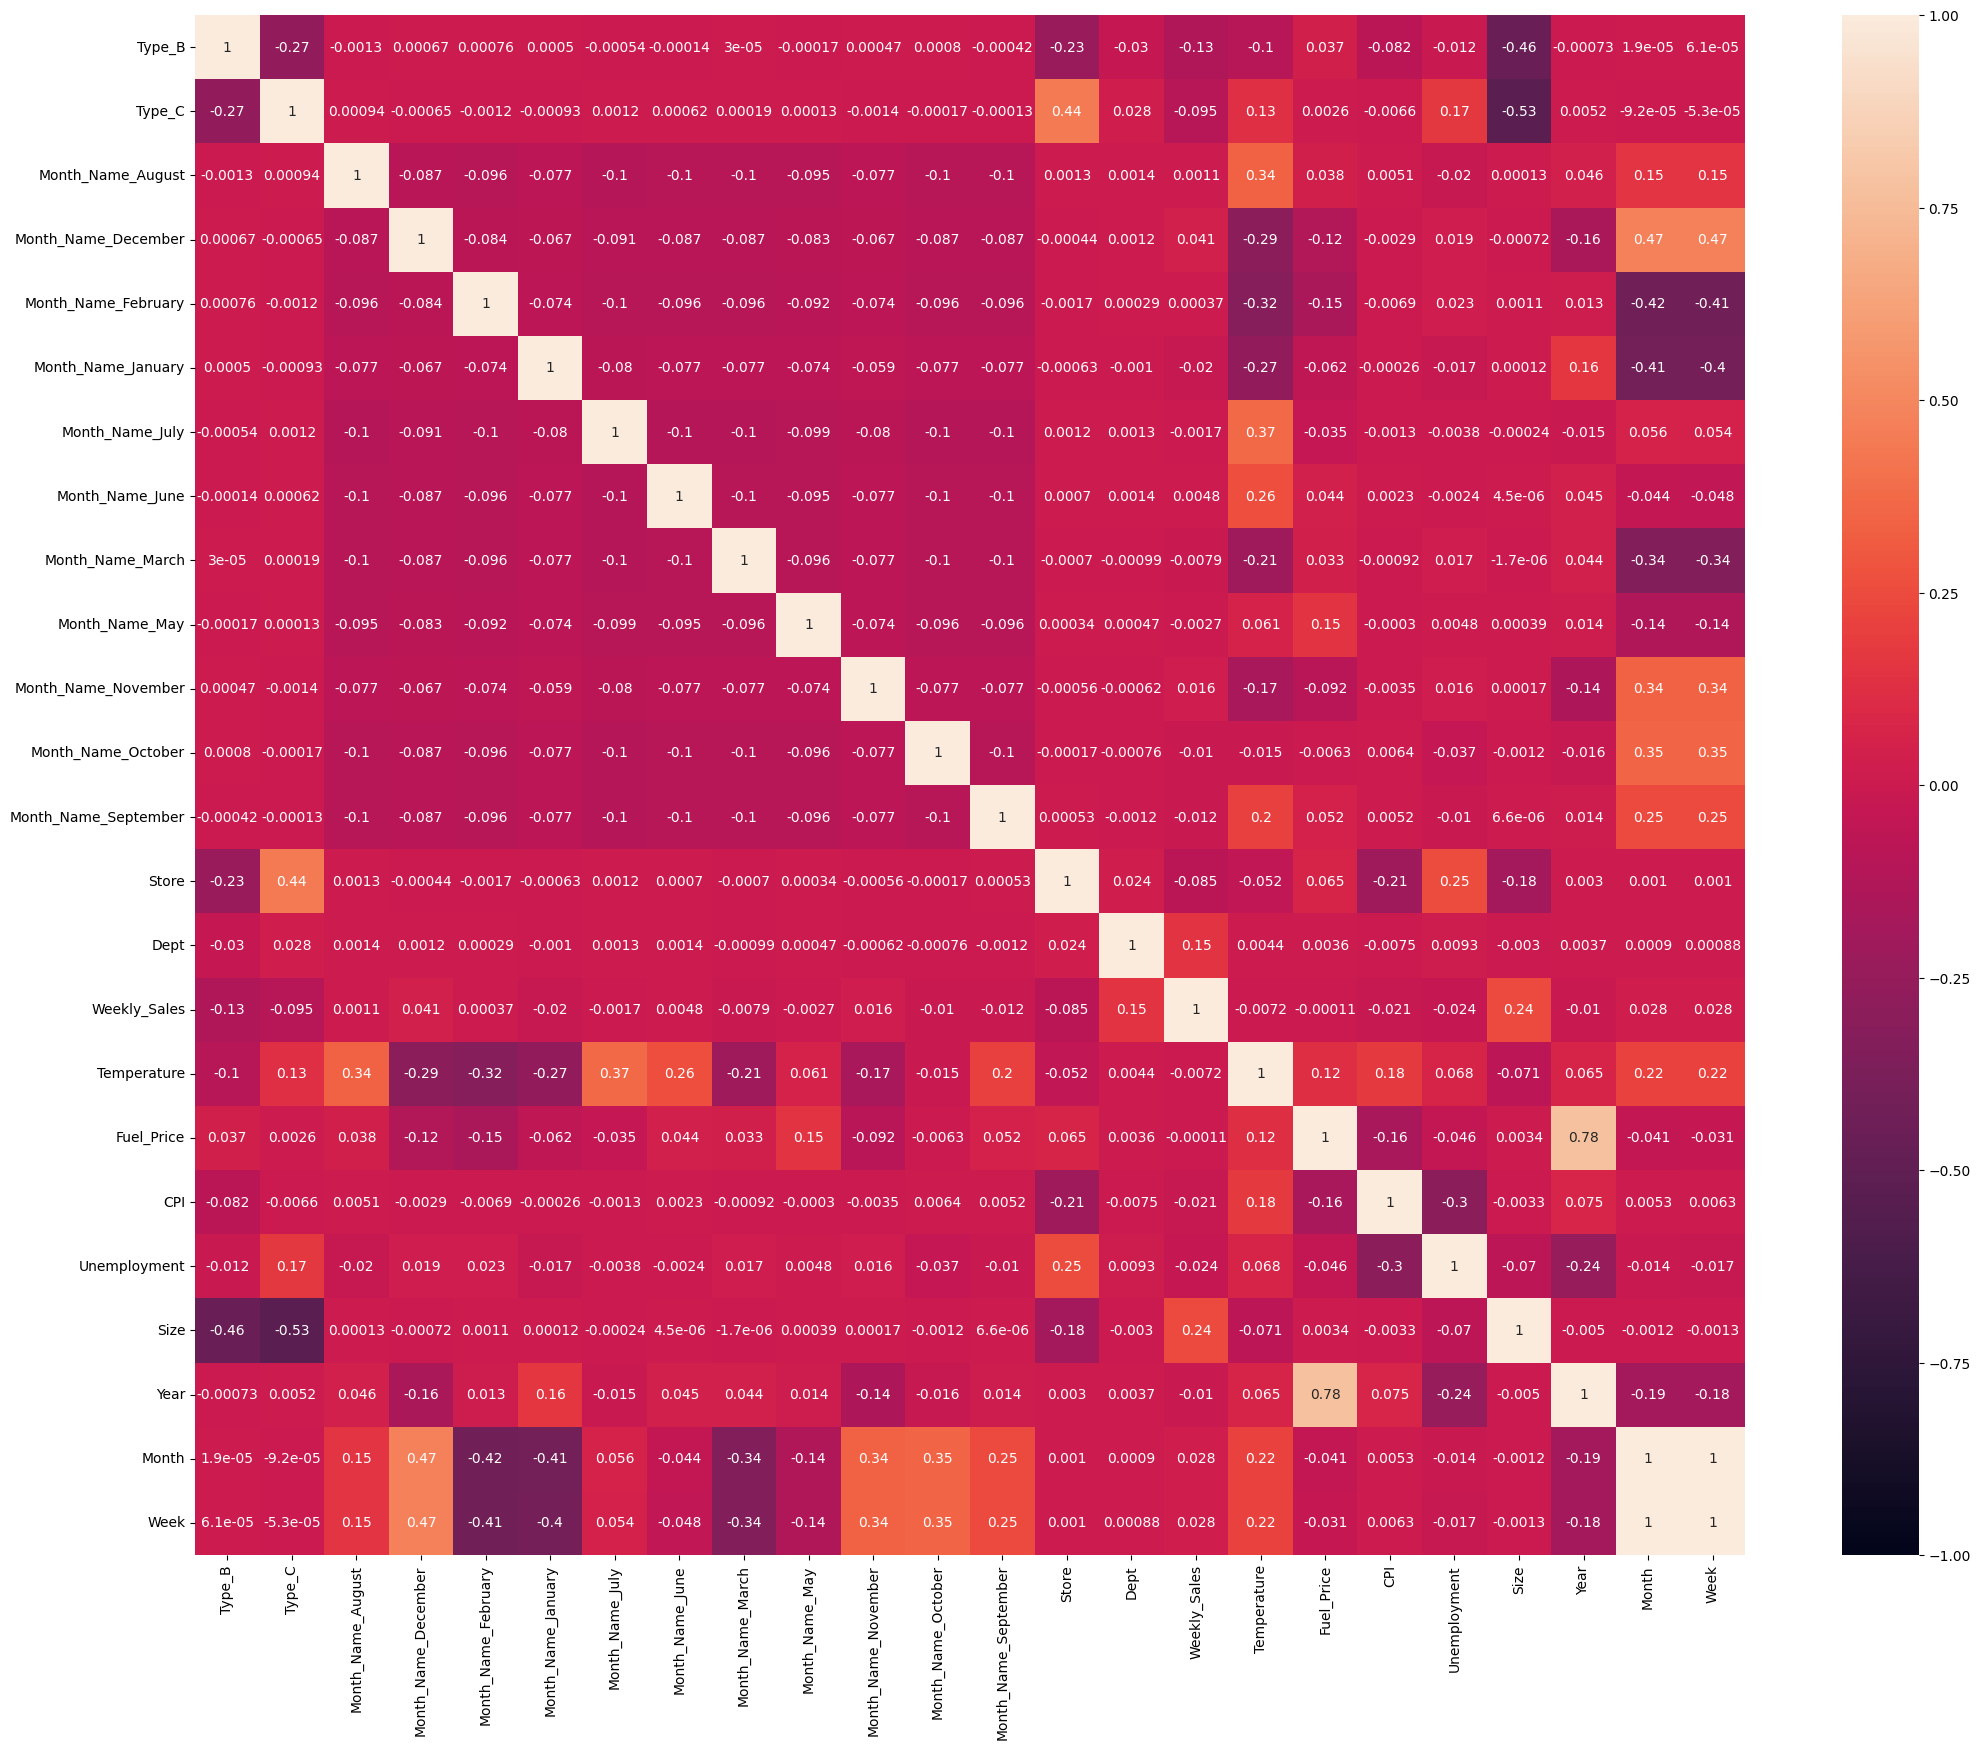

In [47]:
# Checking correlation:

plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)

As Corr is more than 0.75 between Year and Fuel_Price, we have to drop one of them. To decide which one to drop, we will call VIF and drop the feature with higher VIF.

In [48]:
data.dtypes

Type_B                    uint8
Type_C                    uint8
Month_Name_August         uint8
Month_Name_December       uint8
Month_Name_February       uint8
Month_Name_January        uint8
Month_Name_July           uint8
Month_Name_June           uint8
Month_Name_March          uint8
Month_Name_May            uint8
Month_Name_November       uint8
Month_Name_October        uint8
Month_Name_September      uint8
Store                     int64
Dept                      int64
Weekly_Sales            float64
Temperature             float64
Fuel_Price              float64
CPI                     float64
Unemployment            float64
Size                      int64
Year                      int64
Month                     int64
Week                     UInt32
dtype: object

In [49]:
object_columns = data.select_dtypes(include=['object']).columns
print(object_columns)


Index([], dtype='object')


In [50]:
data = data.astype(int)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data

""


In [52]:
vif_data['Features'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,Features,VIF
0,Type_B,2.523422e+00
1,Type_C,2.749745e+00
2,Month_Name_August,1.687784e+06
3,Month_Name_December,5.273131e+06
4,Month_Name_February,3.930732e+05
5,Month_Name_January,5.862157e+05
6,Month_Name_July,1.019264e+06
7,Month_Name_June,4.214830e+05
8,Month_Name_March,1.063970e+05
9,Month_Name_May,9.762420e+04


In [53]:
data.drop(['Year'], axis = 1, inplace = True)

<Axes: >

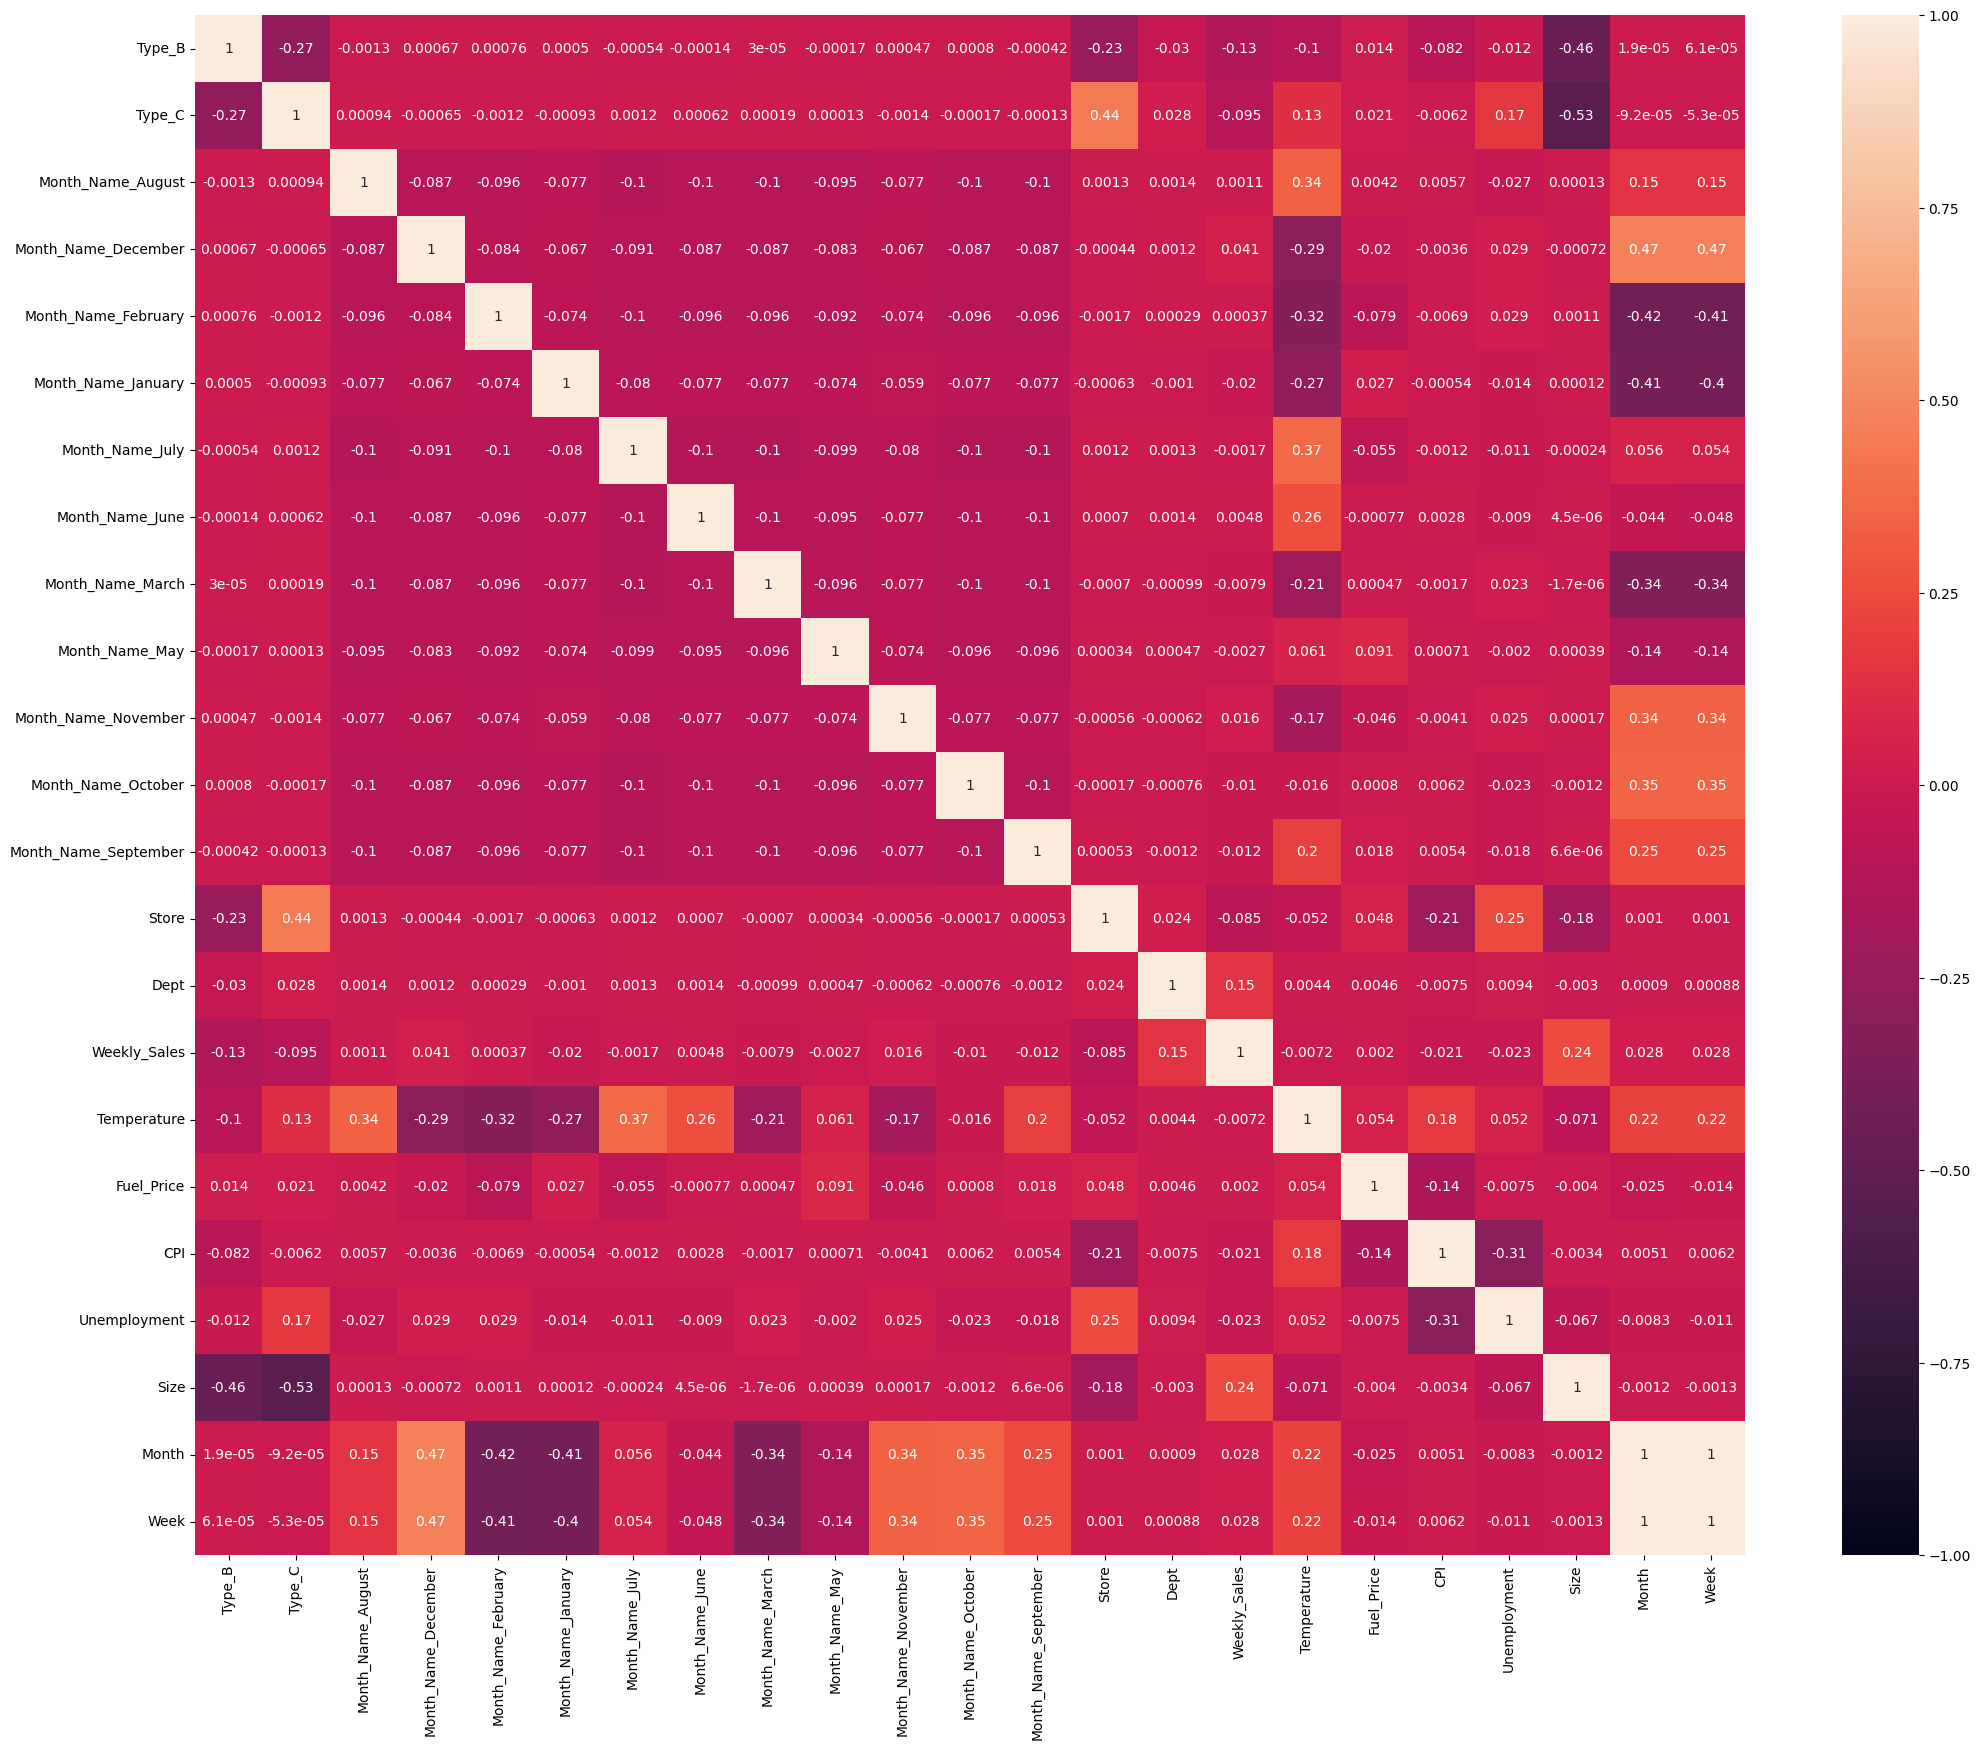

In [54]:
# We will plot our heatmap again and check for correlation:

plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)

As no columns have high correlation (> 0.75) among themselves, we can go ahead with out model.

# Linear Regression Model

In [55]:
x = data.drop(['Weekly_Sales'], axis = 1)
y = data['Weekly_Sales']

In [56]:
y.dtypes

dtype('int32')

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 10)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('MSE = ', mse)
print('R2 Score = ', r_squared)

MSE =  467139742.8974474
R2 Score =  0.09210699568548797


In [59]:
import statsmodels.api as sm

X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2022.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:55:37   Log-Likelihood:            -4.8066e+06
No. Observations:              421570   AIC:                         9.613e+06
Df Residuals:                  421548   BIC:                         9.613e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1721.7490 

We will drop columns with P value > 0.05.

In [60]:
x.drop(['Month_Name_January'], axis = 1, inplace = True)

In [61]:
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2022.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:55:38   Log-Likelihood:            -4.8066e+06
No. Observations:              421570   AIC:                         9.613e+06
Df Residuals:                  421548   BIC:                         9.613e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1621.0542 

This time we will drop Type B.

In [65]:
x.drop(['Type_B'], axis = 1, inplace = True)

In [66]:
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2123.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:56:55   Log-Likelihood:            -4.8066e+06
No. Observations:              421570   AIC:                         9.613e+06
Df Residuals:                  421549   BIC:                         9.613e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1586.3445 

In [67]:
x.drop(['Fuel_Price'], axis = 1, inplace = True)

In [68]:
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2235.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:57:39   Log-Likelihood:            -4.8066e+06
No. Observations:              421570   AIC:                         9.613e+06
Df Residuals:                  421550   BIC:                         9.613e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1408.5955 

In [69]:
x.drop(['Month_Name_November'], axis = 1, inplace = True)

X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2359.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:58:17   Log-Likelihood:            -4.8066e+06
No. Observations:              421570   AIC:                         9.613e+06
Df Residuals:                  421551   BIC:                         9.613e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1190.0521 

In [70]:
# Now lets call train test split again

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 100)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)


Mean Squared Error =  474264399.2070912
R2 Score =  0.09278676490944526


In [71]:
# Scale the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
lr = LinearRegression()
lr.fit(x_train2, y_train)
y_pred1 = lr.predict(x_test2)

mse_scaled = mean_squared_error(y_test, y_pred1)
r_squared_scaled = r2_score(y_test, y_pred1)
print('Scaled Mean Squared Error = ', mse_scaled)
print('Scaled R2 Score = ', r_squared_scaled)

Scaled Mean Squared Error =  474264399.20709306
Scaled R2 Score =  0.09278676490944171


In [72]:
# Lets put our prediction into a new dataframe to compare our prediction with test

pred_data = pd.DataFrame(np.column_stack((y_pred1, y_test)), columns = ['Prediction', 'Test'])
pred_data

,Prediction,Test
0,24210.717473,73093.0
1,17121.221511,71469.0
2,14636.229830,23004.0
3,7201.427306,38.0
4,11497.725090,4240.0
...,...,...
84309,17990.688306,35853.0
84310,3069.496376,8339.0
84311,19794.601464,3199.0
84312,12993.284569,1810.0
